In [219]:
 # IMPORT STATEMENTS
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

In [230]:
#LOAD THE CSV FILE & USE THE COLOUMN'S 0, 6 and 12
df = pd.read_csv('../data/dftRoadSafetyData_Accidents_2018.csv',usecols=[0,6,12],index_col=0)
df

,Accident_Severity,Local_Authority_(District)
Accident_Index,,
2018010080971,3,2
2018010080973,3,17
2018010080974,3,3
2018010080981,2,17
2018010080982,2,6
...,...,...
2018984115718,3,917
2018984115918,3,917
2018984116018,3,917


In [231]:
#Rename column
df.columns = ['Severe','Borough']
#Set the type for severity as categorical
df['Severe'] = df['Severe'].astype('category')
#df['Borough'] = df['Borough'].astype('category')
df.dtypes

Severe     category
Borough       int64
dtype: object

In [232]:
#is_inner =  df['Borough']<13
df = df.loc[df['Borough'] < 13]
#winners = data.loc[data.bid == data.price]
df.head()

,Severe,Borough
Accident_Index,,
2018010080971,3,2
2018010080974,3,3
2018010080982,2,6
2018010080986,2,12
2018010080987,3,7


In [233]:
#df_inner = df[is_inner]
#df_inner

In [235]:
#Set the type for  the borough column as categorical
df['Borough'] = df['Borough'].astype('category')
df

/opt/rh/rh-python36/root/usr/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Severe,Borough
Accident_Index,,
2018010080971,3,2
2018010080974,3,3
2018010080982,2,6
2018010080986,2,12
2018010080987,3,7
...,...,...
201801T820380,3,4
201801T820386,3,5
2018480258825,2,3


In [236]:
#Rename the borough categories
b_group = ['Westminster', 
           'Camden', 
           'Islington', 
           'Hackney', 
           'Tower Hamlets', 
           'Greenwich', 
           'Lewisham', 
           'Southwark', 
           'Lambeth', 
           'Wandsworth', 
           'Hammersmith and Fulham',
           'Kensington and Chelsea'
          ]
df['Borough'] = df['Borough'].cat.rename_categories(b_group)
df['Severe'] = df['Severe'].cat.rename_categories(['Fatal', 'Serious', 'Slight'])

df

/opt/rh/rh-python36/root/usr/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/opt/rh/rh-python36/root/usr/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


,Severe,Borough
Accident_Index,,
2018010080971,Slight,Camden
2018010080974,Slight,Islington
2018010080982,Serious,Greenwich
2018010080986,Serious,Kensington and Chelsea
2018010080987,Slight,Lewisham
...,...,...
201801T820380,Slight,Hackney
201801T820386,Slight,Tower Hamlets
2018480258825,Serious,Islington


In [241]:
#Count the total number of categories
counts = df['Borough'].value_counts(sort=True)
counts

Westminster               1509
Lambeth                   1287
Southwark                 1152
Tower Hamlets             1132
Wandsworth                 982
Camden                     911
Hackney                    854
Lewisham                   836
Islington                  769
Greenwich                  714
Hammersmith and Fulham     706
Kensington and Chelsea     683
Name: Borough, dtype: int64

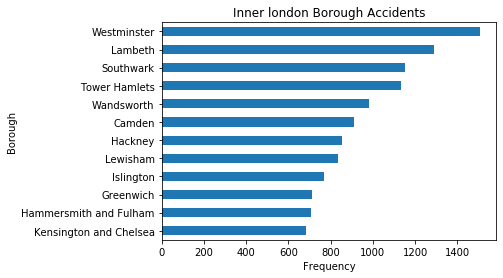

In [238]:
#Plot the inner london borough barchart. 
ax = counts.plot.barh()
ax.invert_yaxis()
ax.set_title('Inner london Borough Accidents') 
ax.set_ylabel('Borough')
ax.set_xlabel('Frequency')
plt.savefig("Borough-Inner.png", dpi=300, bbox_inches='tight')
plt.show()

In [239]:
#Cross tabulate the the two columns borough and severity and normalize by column
pc = pd.crosstab(df['Borough'], df['Severe'], normalize='columns')
pc = pc * 100
#pc = pc.sort_values(by='Fatal', ascending=False)
pc

Severe,Fatal,Serious,Slight
Borough,,,
Westminster,7.317073,14.696133,12.804626
Camden,12.195122,7.900552,7.878976
Islington,4.878049,7.348066,6.546881
Hackney,4.878049,8.176796,7.269723
Tower Hamlets,4.878049,8.563536,10.068154
Greenwich,19.512195,5.469613,6.268071
Lewisham,14.634146,5.414365,7.558860
Southwark,4.878049,10.110497,9.985543
Lambeth,2.439024,10.994475,11.224701


Text(0.5, 0, '%')

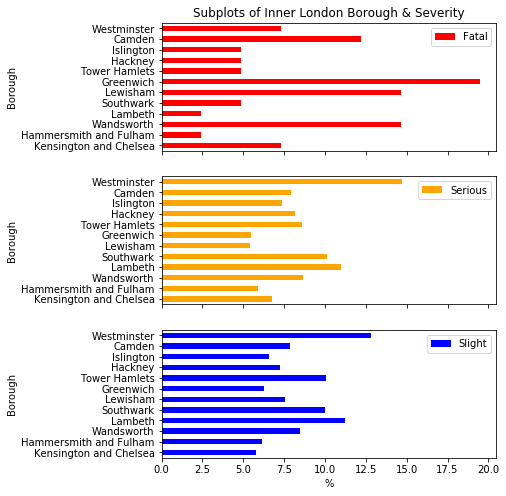

In [240]:
#Plot the subplots and do not sort by highest count. keep the order the same
figure, axes = plt.subplots(3,1,figsize=(6,8),sharex=True)
axes[0].title.set_text('Subplots of Inner London Borough & Severity')
pc['Fatal'].plot.barh(ax=axes[0],color=['red'])
axes[0].invert_yaxis()
axes[0].legend(loc="upper right")
pc['Serious'].plot.barh(ax=axes[1],color=['orange'])
axes[1].invert_yaxis()
axes[1].legend(loc="upper right")
pc['Slight'].plot.barh(ax=axes[2],color=['blue'])
axes[2].invert_yaxis()
axes[2].legend(loc="upper right")
plt.xlabel('%')
plt.savefig("innerBorough Subplot.png", dpi=300, bbox_inches='tight')
